# Precios de Casas:

A  partir  de  la  base  de  datos  de  precios  de  casas  de  Boston ( Boston  Housing  Data
),  realiza  la regresión de los precios de las casas con las siguientes variantes:

* Usando m ́ınimos cuadrados
* Aplicando regularización por norma $l_{1}$ y $l_2$
* Expandiendo los atributos con funciones base polinomiales
* Seleccionando los atributos más importantes

Grafica el error de generalización del modelo con diferentes grados del polinomio, coeficientes de
regularización  y  n ́umero  de  atributos.  Todos  los  modelos  deber ́an  ser  evaluados  con  validación
cruzada de 10 particiones

In [1]:
# Se obtiene los datos de la liga que esta se encuentra de a continuación:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

--2017-03-20 19:43:33--  http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘housing.data.1’

housing.data.1      100%[===================>]  47.93K   187KB/s    in 0.3s    

2017-03-20 19:43:34 (187 KB/s) - ‘housing.data.1’ saved [49082/49082]



In [8]:
#Funcion MyLinearRegression la cual se baso en el código proporcionado por  @Dr. Gibran Fuentes-Pineda
def MyLinearRegression(X_train,y_train):
    # Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
    # (XT X)
    XTX = np.dot(X_train.T, X_train)
    # (XT X)-1
    XTX_inv = np.linalg.inv(XTX)
    # XT y
    XTy = np.dot(X_train.T, y_train)
    #theta_ml = (XT X)-1 XT y
    theta_ml = np.dot(XTX_inv, XTy)
    return theta_ml

In [9]:
import numpy as np

#Se cargan los datos.
data = np.loadtxt("housing.data")

# divide aleatoriamente la base de datos en entrenamiento (80%) y validación (20%)
indices = numpy.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(data.shape[0]*0.8)], indices[int(data.shape[0]*0.8):]
X_train, X_test = data[training_idx,:], data[test_idx,:]

#mostrando las dimensiones que tienen el conjunto de entrenamiento y el de test
print (X_train.shape)
print (X_test.shape)

(404, 14)
(102, 14)


In [30]:
# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
X_train_ones_p = np.insert(X_train,0,1.0,axis=1)
X_test_ones_p = np.insert(X_test,0,1.0,axis=1)

# Se obtiene las variables que entraran al modelo
X_train_ones=X_train_ones_p[:,0:14]
X_test_ones=X_test_ones_p[:,0:14]

# Se obtienen las variables que se van a predecir.
y_train=X_train_ones_p[:,14:15]
y_test=X_test_ones_p[:,14:15]

In [31]:
#Madar a llamar a la función que implementamos.
print ("Coefficients: \n",MyLinearRegression(X_train_ones,y_train))

('Coefficients: \n', array([[  4.03774036e+01],
       [ -1.02804588e-01],
       [  5.69318523e-02],
       [  5.98518997e-02],
       [  2.92527491e+00],
       [ -2.14960437e+01],
       [  3.44351511e+00],
       [  2.33202415e-02],
       [ -1.43919398e+00],
       [  3.31474637e-01],
       [ -1.22792427e-02],
       [ -1.00683412e+00],
       [  8.38920765e-03],
       [ -5.86707564e-01]]))


# Usando sklearn:

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train_ones, y_train)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  4.03774036e+01,  -1.02804588e-01,   5.69318523e-02,
          5.98518997e-02,   2.92527491e+00,  -2.14960437e+01,
          3.44351511e+00,   2.33202415e-02,  -1.43919398e+00,
          3.31474637e-01,  -1.22792427e-02,  -1.00683412e+00,
          8.38920765e-03,  -5.86707564e-01]]))


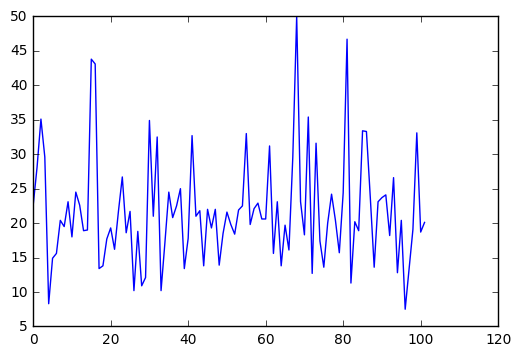

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()